In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [20]:
data=pd.read_csv('https://raw.githubusercontent.com/nadaalay/Heart-Disease-Classifier-Web-App/master/data.csv')
data['target'].replace(to_replace=1,value=0,inplace=True)
data['target'].replace(to_replace=2,value=1,inplace=True)
df=data.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0



# Basic Statistics on numeric columns

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


# Check for Null values

In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Comment:-** No null value present.

# Handling categorical features

In [23]:
df= pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)
df

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1,ca_2,ca_3,thal_6,thal_7
0,70,130,322,109,2.4,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,67,115,564,160,1.6,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,57,124,261,141,0.3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,64,128,263,105,0.2,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
4,74,120,269,121,0.2,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
266,44,120,263,173,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
267,56,140,294,153,1.3,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
268,57,140,192,148,0.4,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [24]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_2', 'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_2', 'slope_3', 'ca_1', 'ca_2', 'ca_3', 'thal_6', 'thal_7'],
      dtype='object')

# Feature Scaling

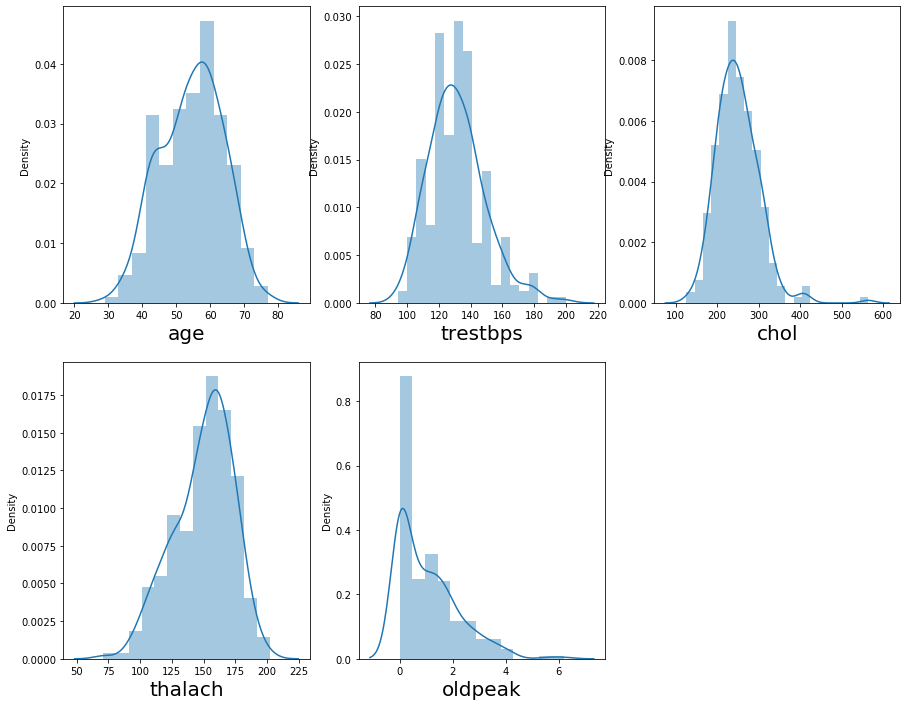

In [25]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber=1

for i in df:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [26]:
scaler=StandardScaler()
col_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [27]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1,ca_2,ca_3,thal_6,thal_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0


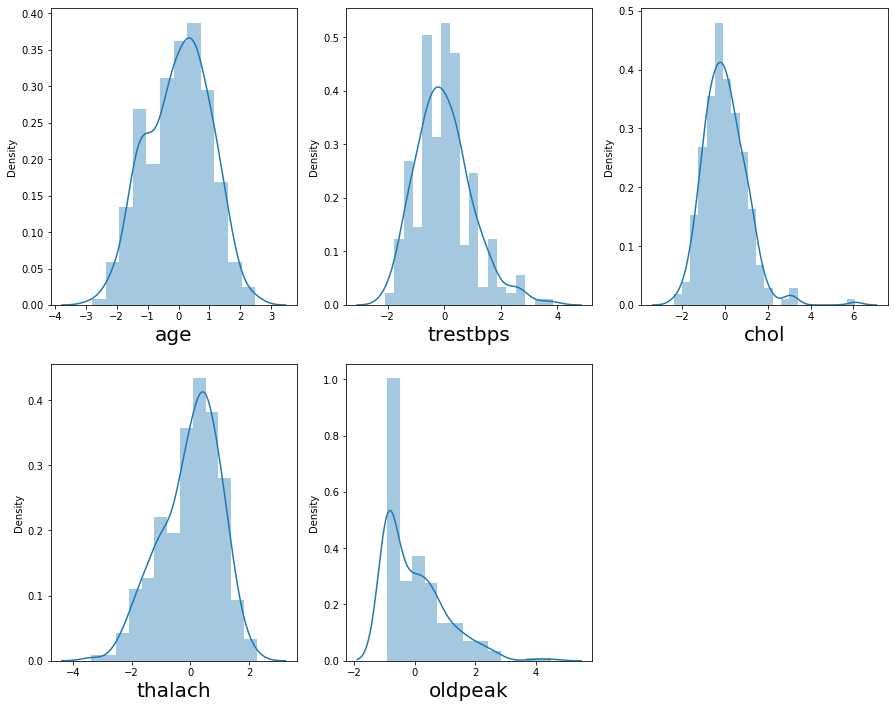

In [28]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber=1

for i in df:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

# Splitting the dataset into dependent and independent features

In [38]:
y=df['target']
X=df.drop(columns='target')

**Split the data into training set and testing set**

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size= 0.25,random_state=42)

# K Nearest Neighbors(KNN) Classifier Model

In [41]:
#let's fit the data into kNN model and see how well it performs:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn.predict(x_test)

In [44]:
knn.score(x_train,y_train)

0.8613861386138614

In [45]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.8088235294117647


# Let's try to increase the accuracy by using hyperparameter tuning.

In [60]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [2,3,5,7,9,10,11,12,14,13,15,16,17]
              }

In [61]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [62]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 273 candidates, totalling 1365 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.610, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.725, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.732, total=   0.0s
[CV] algorit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.825, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.659, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.900, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.775, total= 

[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=2, score=0.756, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=2, score=0.725, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=2, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=2, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.732, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV] 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=17, score=0.561, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=17, score=0.878, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=17, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=17, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=17, score=0.825, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=2, score=0.610, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=2, score=0.756, to

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.850, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=16 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=16, score=0.585, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=16 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=16, score=0.829, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=16 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=16, score=0.775, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=16 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=16, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=16 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=16, score=0.825, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.585, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=15, score=0.585, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=15, score=0.878, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.829, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.775, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=14, score=0.585, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=14, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=14 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=14, score=0.800, 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.825, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.585, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.829, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.800, 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.775, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.900, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.725, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.610, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.829, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.800, tota

[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.659, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.805, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.900, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.610, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=k

[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=2, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=2, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.732, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.750, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.825, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=k

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=16, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=16, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=16, score=0.825, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, score=0.561, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, score=0.878, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, score=0.950, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=15, score=0.850, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=16, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=16, score=0.829, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=16, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=16, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=16 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=16, score=0.825, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=17, score=0.561, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=15 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=15, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=15 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=15, score=0.878, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=15 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=15, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=15 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=15, score=0.925, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=14, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=14, score=0.805, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=14, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=14, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=14, score=0.850, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, score=0.854, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.829, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=14, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=14, score=0.805, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.825, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.585, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.829, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.775, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=14 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=14, score=0.585, total=   0.0s


[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.900, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.854, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.925, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, 

[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.854, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.775, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.900, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.725, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.829, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.800, total=   0.0s
[CV] algorithm=bru

[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.854, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.850, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.850, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_s

[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.659, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.805, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.900, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.775, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_s

[CV] algorithm=brute, leaf_size=30, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=2, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=2, score=0.756, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=2, score=0.725, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=2, score=0.800, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=2, score=0.750, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.732, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_s

[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, score=0.561, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, score=0.878, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, score=0.825, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=2, score=0.610, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=2, score=0.756, total=   0.0s
[CV] algorithm=b

[CV]  algorithm=brute, leaf_size=32, n_neighbors=15, score=0.925, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=15, score=0.850, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=16 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=16, score=0.585, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=16 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=16, score=0.829, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=16 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=16, score=0.775, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=16 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=16, score=0.925, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=16 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=16, score=0.825, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.925, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=15, score=0.585, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=15, score=0.878, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=15, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=15, score=0.925, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 1365 out of 1365 | elapsed:   33.2s finished


GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18,
                                            n_neighbors=15),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [2, 3, 5, 7, 9, 10, 11, 12, 14, 13, 15,
                                         16, 17]},
             verbose=3)

In [63]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 15}

In [64]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =15)

In [65]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=15)

In [66]:
knn.score(x_train,y_train)

0.8267326732673267

**Comment:-**Looks like accuracy for training has decreased, maybe our model was overfitting the data before. Let's see how it perfroms on the test data.

In [67]:
knn.score(x_test,y_test)

0.7941176470588235

**Comment:-**Great, accuracy score is stable around 80% for our test data. So, indeed our model was overfitting before. Now, it looks better.

In [88]:
# let's save the model
import pickle

with open(r'C:\Users\pnaik27\2021\ML_2021\KNN'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open(r'C:\Users\pnaik27\2021\ML_2021\KNN'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)